# FIND UNIT DISTANCE GRAPH WITH MAXIMUM NUMBER OF EDGES
### Yiheng Su
### Mentors: Adrián Csiszárik, Dániel Varga, Pál Zsámboki

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from BeamSearchUtils import draw as draw_coefficient

## Unit Distance Graph (UDG)
- #### Definition 
    - A **unit distance graph (UDG)** $(V,E)$ is a simple graph defined by

        - $V ⊆ R^{2}$ is a planar subset.
        
        - $E$ = { $(u,v)$: if $u$, $v$ are unit distance away }.

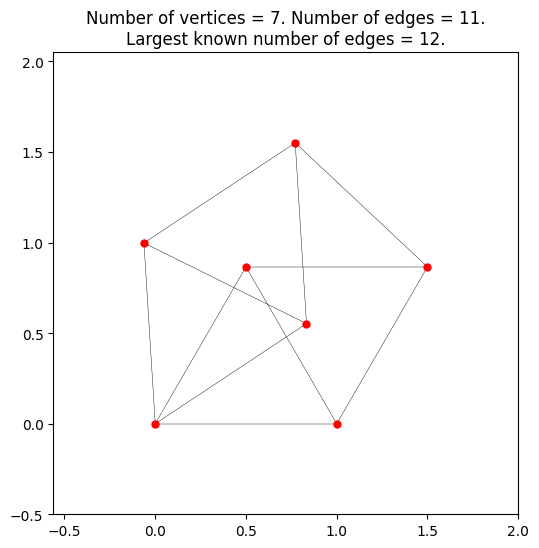

In [21]:
# moser spindle
draw_coefficient([[ 0,  0,  0, 0],
    [ 1,  0,  0, 0],
    [ 0,  1,  0, 0],
    [ 0,  0,  1, 0],
    [ 0,  0,  0, 1],
    [ 1,  0,  1, 0],
    [ 0,  1,  0, 1]])

## Maximum edge number of a UDG
- #### Notation
    - The maximal number of edges in a unit distance graph with $n$ vertices is denoted by $u(n)$.

- #### Example
    - $u(3)=3$.

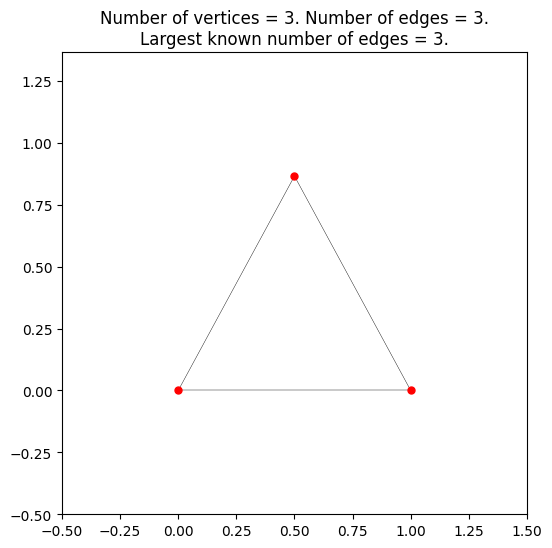

In [22]:
# k_3
draw_coefficient([[0,0,0,0],
    [1,0,0,0],
    [0,0,1,0]] )

## What is the number $u(n)$ when $n$ is large?
- The number of unit distances among n planar points was at most $8 n^{4/3}$ [1,Proof of Theorem 4, 1997].

- The number of unit distances among n planar points is at most  $1.94n^{4/3}$ [2,Theorem 1, 2022].

- Péter Ágoston and Dömötör Pálvölgyi also gave better lower bounds for $n \leq 30$.

1. L. Székely: Crossing numbers and hard Erdős problems in discrete geometry, Combinatorics, Probability and Computing 6 (1997), 353–358.
2. Ágoston, Péter; Pálvölgyi, Dömötör (April 2022), "An improved constant factor for the unit distance problem", Studia Scientiarum Mathematicarum Hungarica, Akademiai Kiado Zrt., 59 (1): 40–57

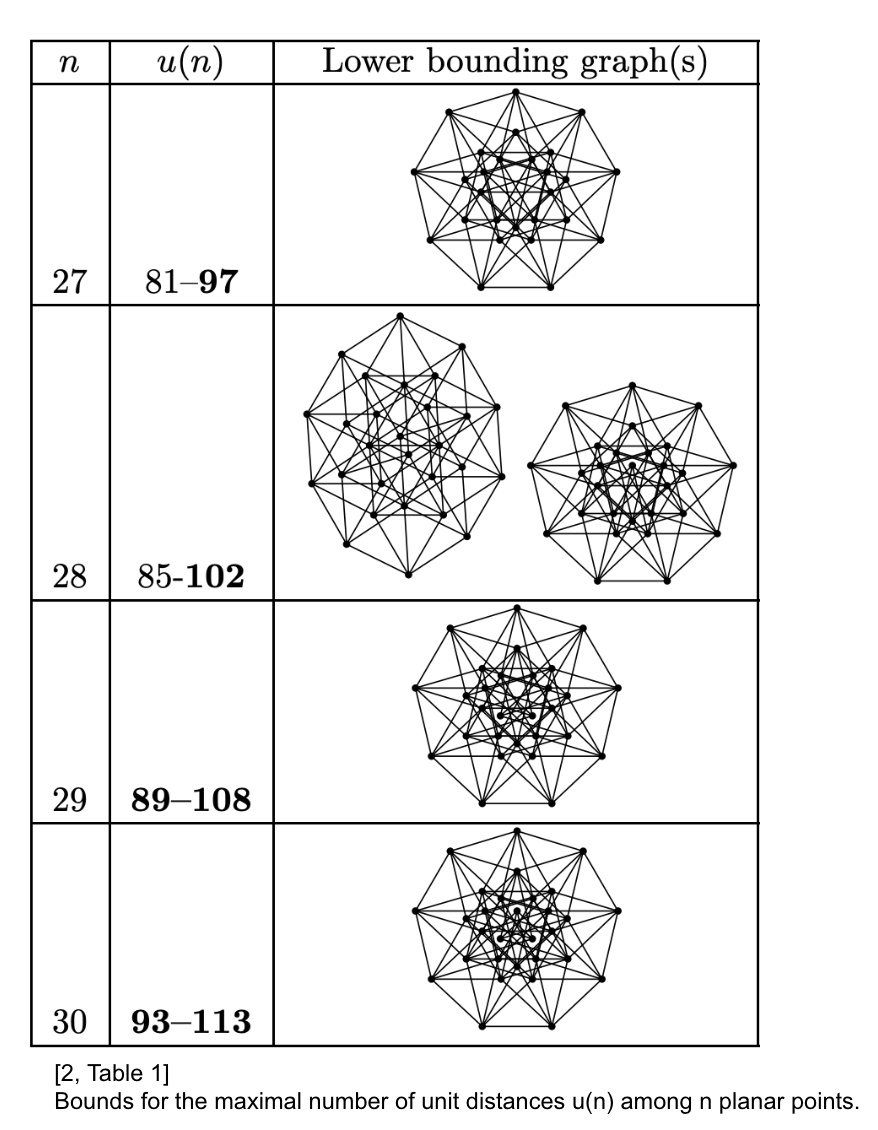

## Moser Lattice
- #### Definition
    - Moser Lattice $M_{L}$ is defined by $$M_{L} = \{ a\cdot 1 + b\cdot\omega_2 + c\cdot\omega_3 + d\cdot\omega_2\omega_3 \mid a, b, c, d \in \mathbb Z\},$$ where $\omega_2 = \frac{1 + i\sqrt{3}}{2}, \omega_3 = \frac{5 + i\sqrt{11}}{6}$. $M_{L}$ is a subgroup of $\mathbb C$ with addition. In polar form, $\omega_2 = e^{i\pi/3}, \omega_3 = e^{i 2 \arcsin(\frac{1}{\sqrt{12}})}.$
    - $M_{L}=\mathbb Z[\omega_2,\omega_3]$.

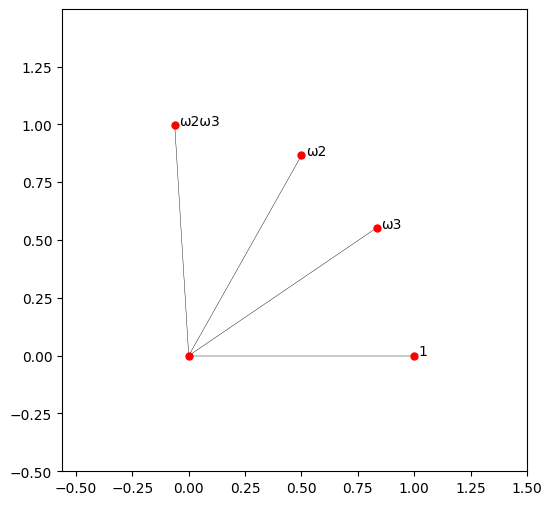

In [23]:
o2 = complex(1/2 , (3**(1/2))/2)
o3 = complex(5/6 , (11**(1/2))/6)
o2o3 = o2 * o3
basis = [0, 1, o2, o3, o2o3]
name = ['', '1', 'ω2', 'ω3', 'ω2ω3']

for b, n in zip(basis, name):
    plt.plot([0, b.real], [0,b.imag], c='black', linewidth = 0.3)
    plt.text(b.real+0.02, b.imag, n)

x_axis = [x.real for x in basis]
y_axis = [x.imag for x in basis]
plt.plot(x_axis, y_axis, '.', color='red', ms=10)
plt.xlim(min(x_axis)-0.5, max(x_axis)+0.5)
plt.ylim(min(y_axis)-0.5, max(y_axis)+0.5)
# draw_coefficient([[ 0,  0,  0, 0],
#     [ 1,  0,  0, 0],
#     [ 0,  1,  0, 0],
#     [ 0,  0,  1, 0],
#     [ 0,  0,  0, 1],
#     [ 1,  0,  1, 0],
#     [ 0,  1,  0, 1]])
plt.show()

- #### The degree of $M_{L}$ is 4.
    - The minimal polynomials of $\omega_{2}$ and $\omega_{3}$ in $\mathbb Q$ are $\omega_{2}^2 - \omega_{2} + 1 = 0$ and $\omega_{3}^2 - \frac{5}{3} \omega_{3} + 1 = 0$, so $[\mathbb Q[\omega_{2},\omega_{3}]:\mathbb Q] = 4.$
    <!-- Since $\mathbb Z[\omega_{2},\omega_{3}] \subset \mathbb Q[\omega_{2},\omega_{3}]$ and  -->

- #### $\{1, \omega_2, \omega_3, \omega_2\omega_3\}$ is a basis for M_L.
    - They are linearly independent using coefficients in $\mathbb Q$ and the size of the basis is equal to $[\mathbb Q[\omega_2, \omega_3] :\mathbb Q]$.


-  #### $M_{L}$ is isomorphic to $\mathbb{Z} \times \mathbb{Z} \times \mathbb{Z} \times \mathbb{Z} = \mathbb{Z}^4$.
    - Proof sketch: Define $\varphi: \mathbb{Z}^4 \rightarrow M_{L}$, where $\varphi((a,b,c,d)) = a\cdot 1 + b\cdot\omega_2 + c\cdot\omega_3 + d\cdot\omega_2\omega_3.$ This map is a isomorphism. The kernel of this map is 0 because 1, $\omega_2$, $\omega_3$, and $\omega_2\omega_3$ are linearly independent. By First Isomorphism Theorem, $\mathbb{Z}^4 / ker(\varphi) = Im(\varphi) \Rightarrow M_{L}\cong\mathbb{Z}^4$.

## Implementation of vertices of UDG in M_L
- Suppose $U$ is a UDG whose vertices are in $M_L$. Give a basis $B = \{1, \omega_2, \omega_3, \omega_2\omega_3\}$ for $M_L$.
We have shown that $M_L \cong \mathbb Z^{4}$ and $\varphi: \mathbb{Z}^4 \rightarrow M_{L}$, where $\varphi((a,b,c,d)) = a\cdot 1 + b\cdot\omega_2 + c\cdot\omega_3 + d\cdot\omega_2\omega_3$, is an isomorphism. Then, for each vertex $v$ of $U$, $v$ can be as $\varphi^{-1}(v) = (a, b, c,d)$ a list of four integer coefficients. Therefore, $U$ is represented by an $n$ by $4$ matrix with integer elements only, where $n$ is the number of vertics of $U$.

- Advantages: Integer additions and mutiplications are more efficient and accurate.

- Example: Moser Spindle can be expressed as a 7x4 matrix.

[ 0.        +0.j          1.        +0.j          0.5       +0.8660254j
  0.83333333+0.5527708j  -0.06204689+0.99807324j  1.5       +0.8660254j
  0.77128645+1.55084403j]


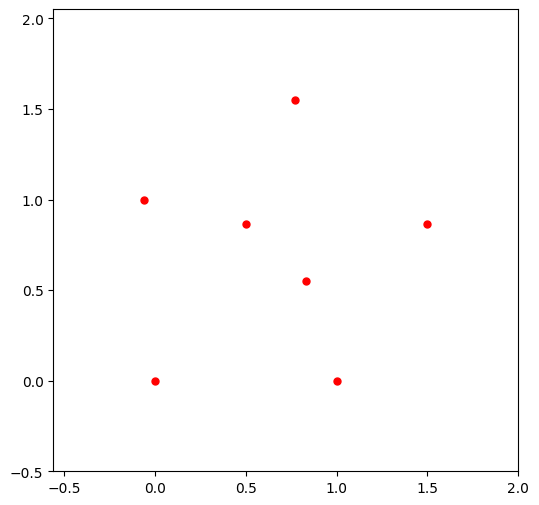

In [24]:
moser_spindle = np.array([
                        [ 0,  0,  0, 0],
                        [ 1,  0,  0, 0],
                        [ 0,  1,  0, 0],
                        [ 0,  0,  1, 0],
                        [ 0,  0,  0, 1],
                        [ 1,  1,  0, 0],
                        [ 0,  0,  1, 1]
                        ])
o2 = complex(1/2 , (3**(1/2))/2)
o3 = complex(5/6 , (11**(1/2))/6)

basis = np.array([1, o2, o3, o2*o3])

moser_spindle_complex = moser_spindle @ basis.T

print(moser_spindle_complex)

x_axis = [x.real for x in moser_spindle_complex]
y_axis = [x.imag for x in moser_spindle_complex]
plt.plot(x_axis, y_axis, '.', color='red', ms=10)
plt.xlim(min(x_axis)-0.5, max(x_axis)+0.5)
plt.ylim(min(y_axis)-0.5, max(y_axis)+0.5)
plt.show()

## Parent and Children
- #### Definition 
    - Given a unit distance graph (UDG) $U$, we introduce a new distinct vertex $u$ to $U$. For all vertices $v \in V(U)$, we add a new edge $(u, v)$ to $U$ if $u$ and $v$ are at a unit distance apart. The resulting UDG $U'$ is called the child of $U$.
    
    - $U$ is referred to as the parent of $U'$.

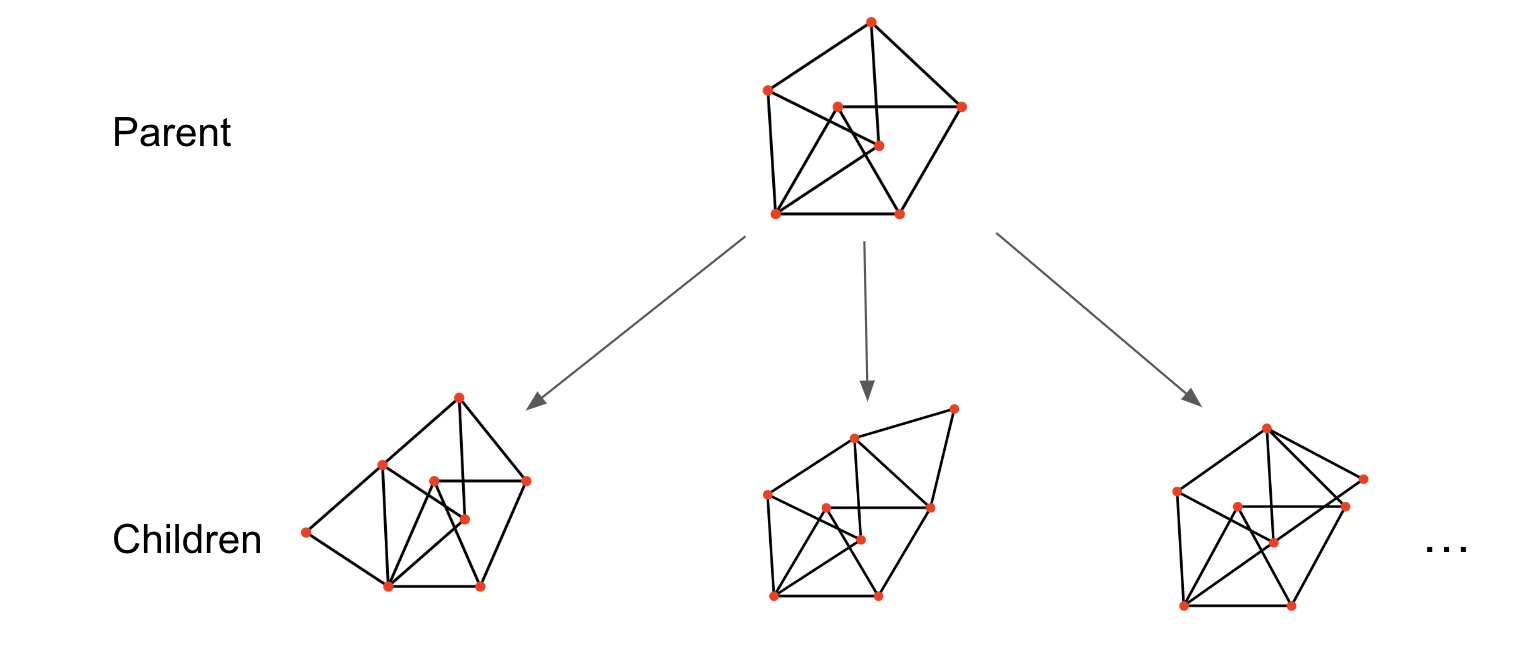

## Get Children 
- #### Rules
    - For a UDG $U$, we get its children via the following 3 operations:
    
        1. Add or Substract a Moser lattice base $b\in \{1, \omega_2, \omega_3, \omega_2\omega_3\}$ to a vertex $v\in V(U)$. Add $b\pm v$ to $U$

        2. Extend a line segment $pq$ of length 1 to a equilateral triangle $pqr$. Add $r$ to $U$.
        
        3. Extend a triangle $pqr$ to a parallelogram $pqrs$, where $pq$ and $qr$ has length 1 and $p \neq r$. Add $s$ to $U$.

    - We need to show the $b\pm v$, $r$, and $s$ from the operations are in $M_L$.
    
        1. Clearly, $b \pm v\in M_L$ because $b,v \in M_L.$

        2. Suppose $p,q\in M_L$. Then $r$ will be $p + \omega_2 \cdot (q - p)$. Show $\omega_2 \cdot q \in M_L$. Assume $q = a\cdot 1 + b\cdot\omega_2 + c\cdot\omega_3 + d\cdot\omega_2\omega_3$ for some $a,b,c,d\in \mathbb Z$. Observe $$\omega_2 \cdot q = (a + b\cdot\omega_2 + c\cdot\omega_3 + d\cdot\omega_2\omega_3)\cdot \omega_2 = a\cdot\omega_2 + b\cdot\omega_2^2 + c\cdot\omega_2\omega_3 + d\cdot\omega_2^2 \omega_3.$$ 
        The minimal polynomial of $\omega_2$ is $\omega_{2}^2 - \omega_{2} + 1 = 0 \Rightarrow \omega_{2}^2 = \omega_{2} - 1$. Substitute $\omega_{2}^2$ with $\omega_{2} - 1$, we have, $$\omega_2 \cdot q = -b\cdot 1 + (a+b)\cdot\omega_2 - d\cdot\omega_3 + (c+d)\omega_2\omega_3 \in M_L.$$ 
        Therefore, $r \in M_L.$

        3. Suppose $p,q, r\in M_L$. $s = q + (p - q) + (r - q)= p - q + r \in M_L$.

In [25]:
def draw_children(self, ax):
    vertices = self.get_vertices()
    adjMatrix = self.compute_adjMatrix()
    size = len(adjMatrix)
    ax.set_title(f" Number of edges = {self.num_of_edges}")

    # draw edges
    for i in range(size):
        for j in range(i+1, size):
            if adjMatrix[i][j]:
                ax.plot([vertices[i].real, vertices[j].real],
                [vertices[i].imag, vertices[j].imag], c='black', linewidth = 0.3)

    # draw vertices
    x_axis = [x.real for x in vertices]
    y_axis = [x.imag for x in vertices]
    ax.plot(x_axis, y_axis, '.', color='red', ms=10)
    ax.set_xlim(min(x_axis)-0.5, max(x_axis)+0.5)
    ax.set_ylim(min(y_axis)-0.5, max(y_axis)+0.5)

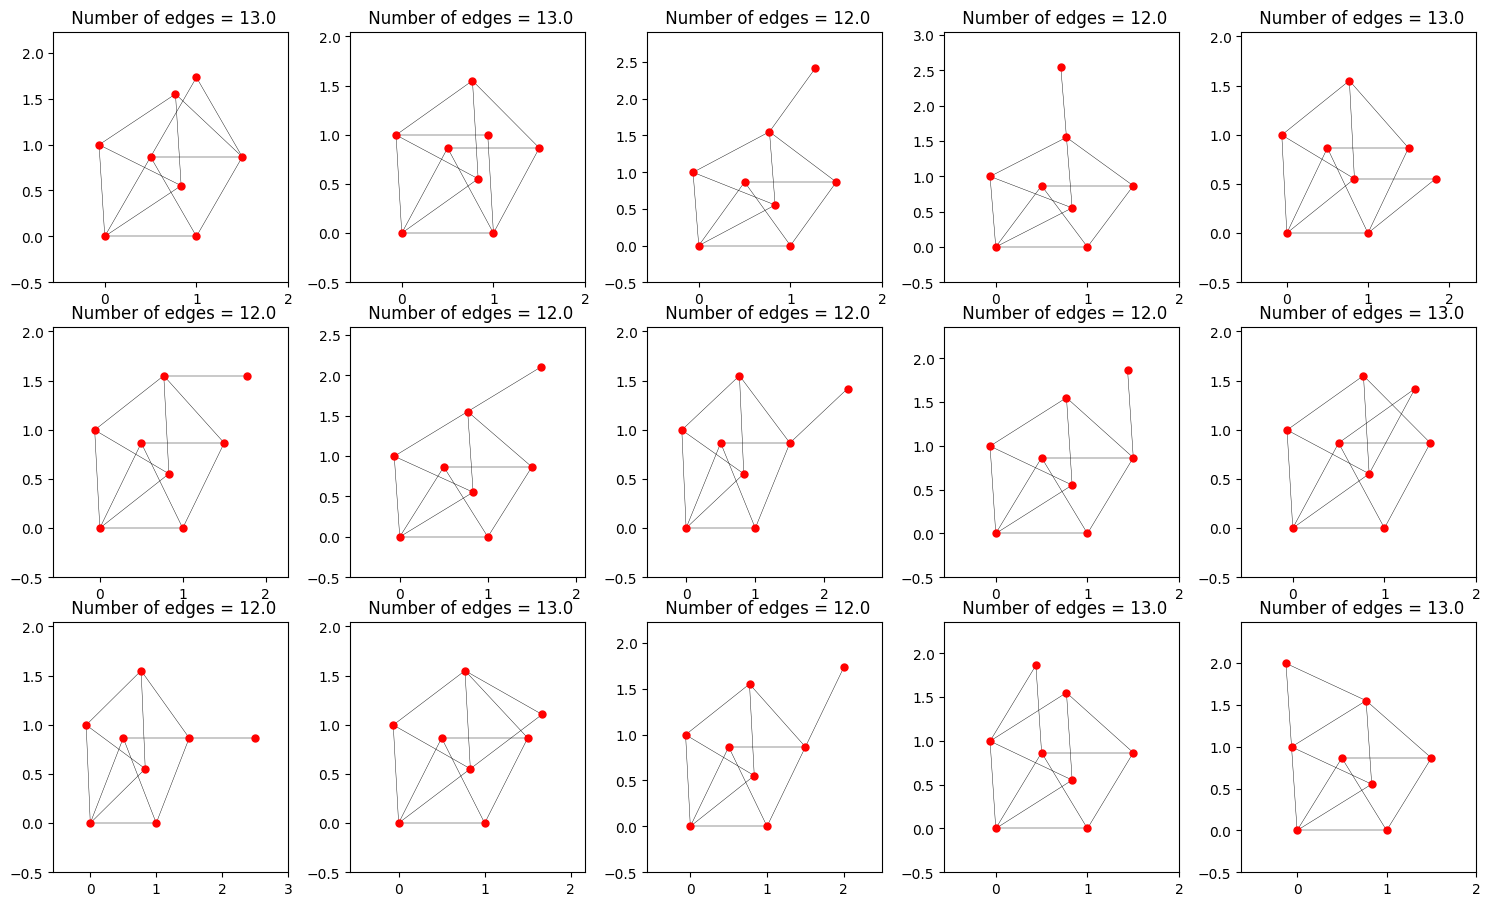

In [26]:
from UDG_Abstract import UDGMoserLattice

m = UDGMoserLattice()
m.initialize(moser_spindle, 10)
children = list(m.get_children())
np.random.shuffle(children)
fig, axs = plt.subplots(3, 5, figsize=(15, 9))
fig.tight_layout()

for i in range(3):
    for j in range(5):
        draw_children(children[i*5+j], axs[i, j])

## Deletion

- We can obtain potential new parents of a UDG $U$ by deleting vertices and their incident edges from $U$.

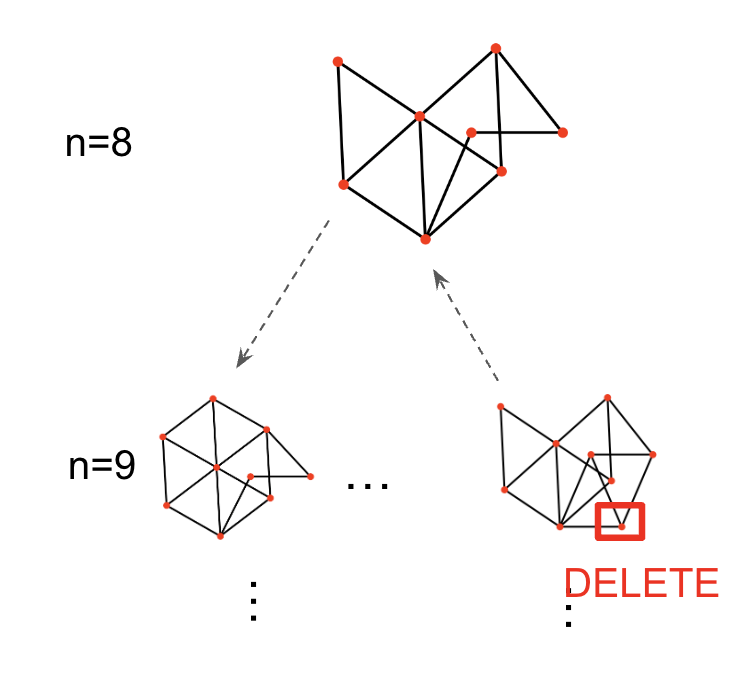

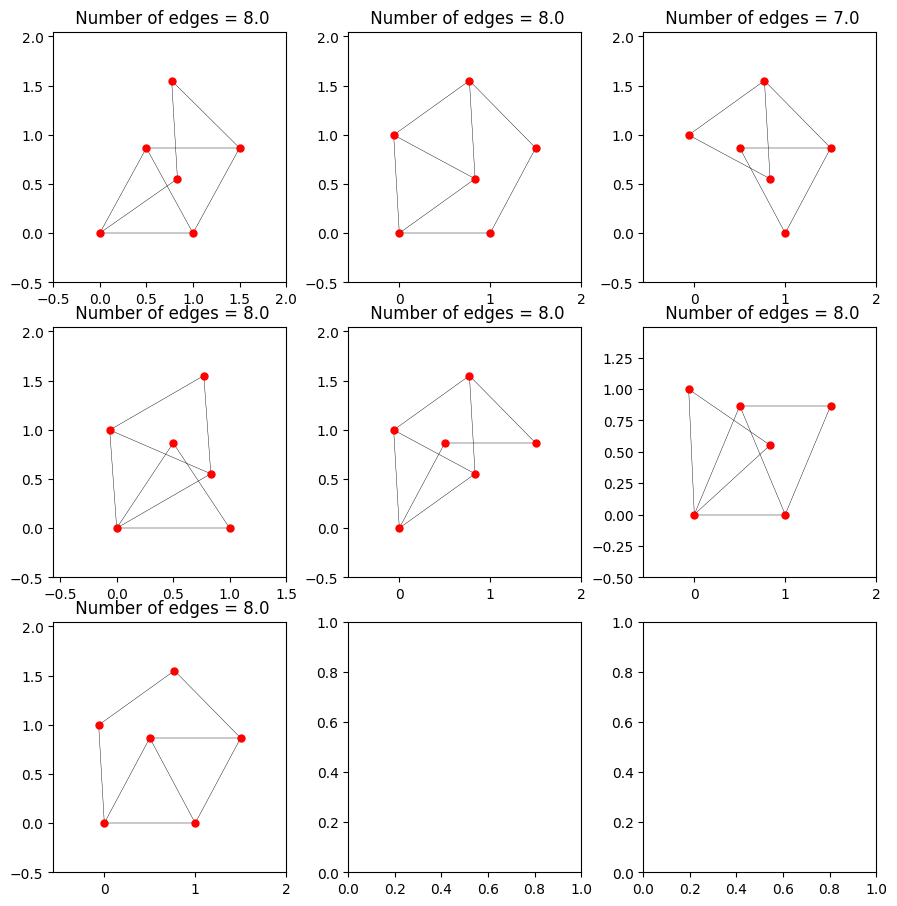

In [27]:
parents = list(m.get_parents())
np.random.shuffle(parents)
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
fig.tight_layout()

for i in range(3):
    for j in range(3):
        if i*3+j < len(parents):
            draw_children(parents[i*3+j], axs[i, j])

## Deduplication
- Problem: We may generate duplicate UDGs during the 'get children' or 'get parent' step.
- Solution: Store all searched UDGs in a separate set called $seen\_udgs$. When we generate a new children or parent $U^*$, check if $U^*\in seen\_udgs$. If $seen\_udgs$ have already contained in $U^*$, discard it.

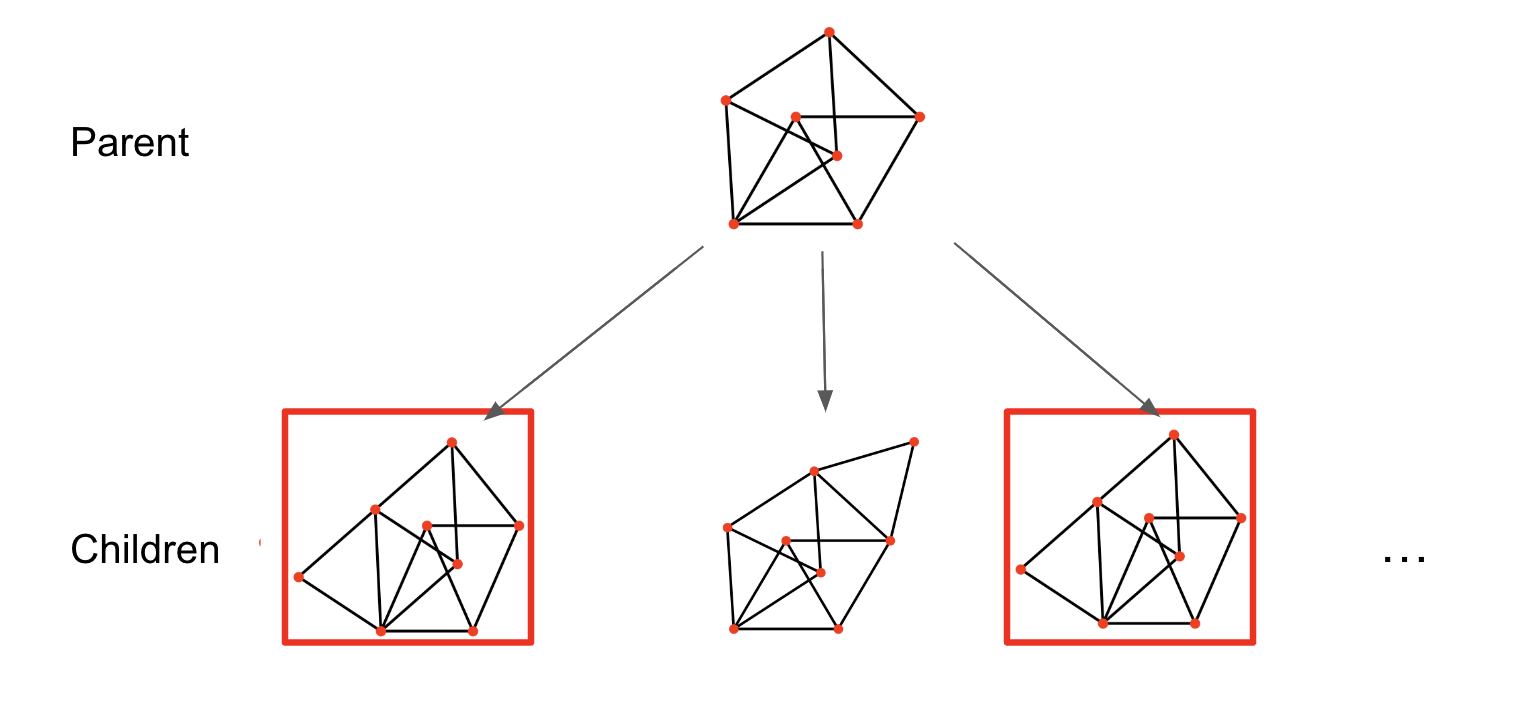

## Beam Search


- The main concept behind  our beam search is to maintain a fixed number (called the beam width) of best UDGs based one the scoring function at each step of the search. Following the completion of the search, the best UDGs are selected based on the scoring function, which evaluates the number of edges in each UDG.

- #### Algorithm for Beam Search

    1. Initialization: Initialize an empty set called $seen\_udgs$. Start with an initial candidate set, $L$, of UDGs containing only Moser Spindle.

    2. Expansion: For each UDG $U' \in L$, get its children according to the rules above and use $seen\_udgs$ to dedupe the replication. Store all the new children in a set $C$.

    4. Scoring: Sort the children in $C$ based on the number of edges (scoring function) from highest to lowest. 

    5. Pruning: Keep the top-$n$ UDGs with the highest scores, where $n$ is the beam width. Let's $L$ contain only those top-$n$ UDGs.

    6. Repeat: Repeat steps 2 to 5 until the UDG's vertex size reaches the target size.

    7. Final selection: Return the UDG with highest edge number found in the search.
    
- #### Example: Search for the edge number of UDG with 11 vertices.
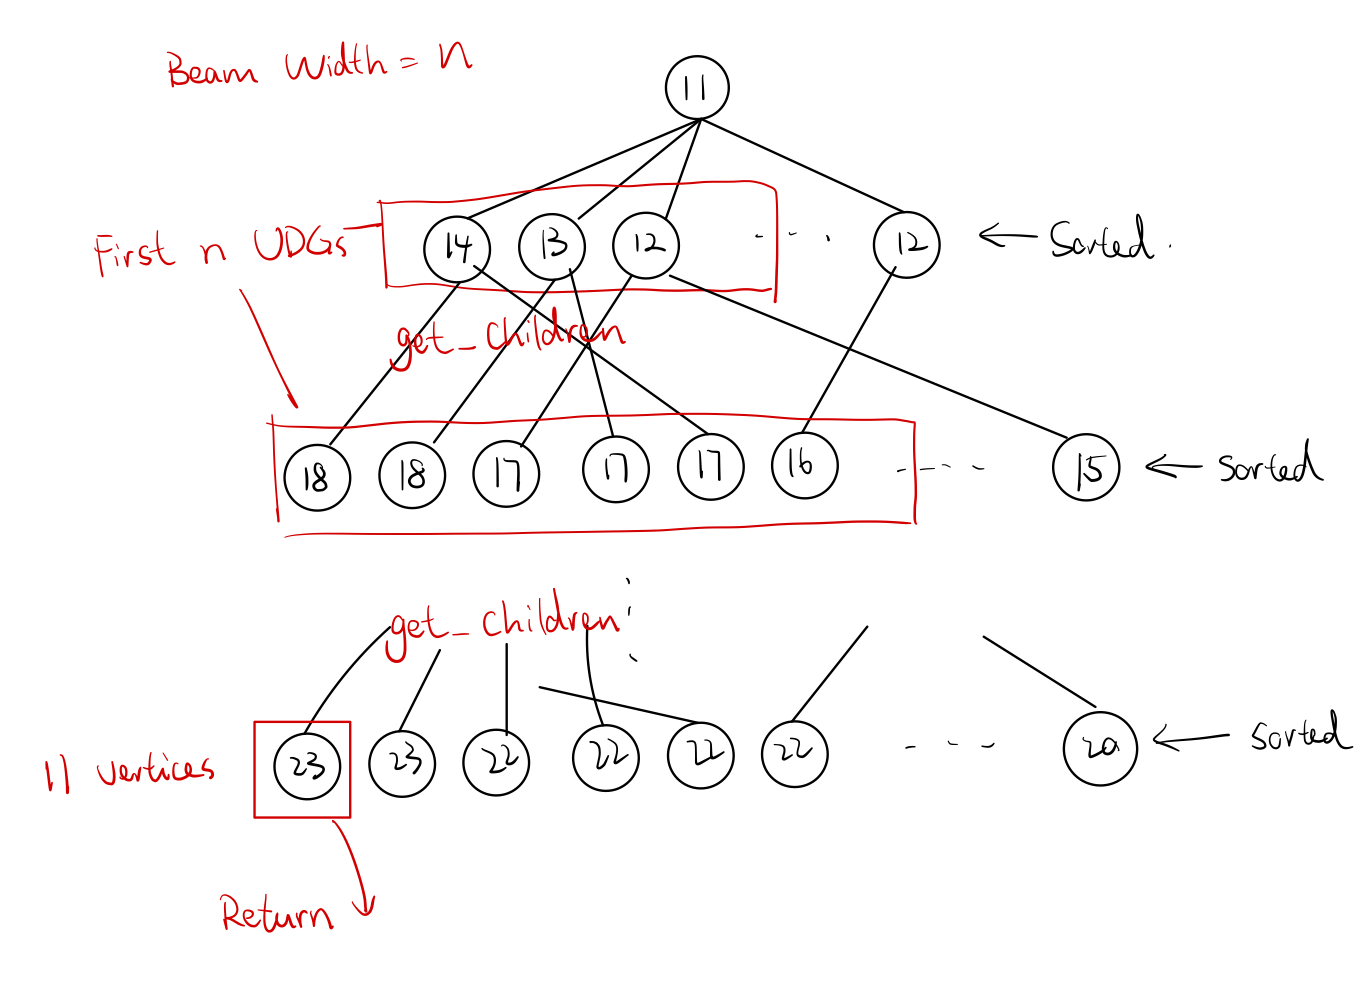

#### Beam Search with Deletion
- Add deletion between the step 2 and 3: For each child  $U' \in C$, get its parents by deleting one vertex from it and use $seen\_udgs$ to dedupe the replication. Store all new parents in a set $P$. Repeat step 2 on set $P$ instead of $L$. If the edge number of children of $P$ is improved, we add new children in $C$ and repeat the deletion step.
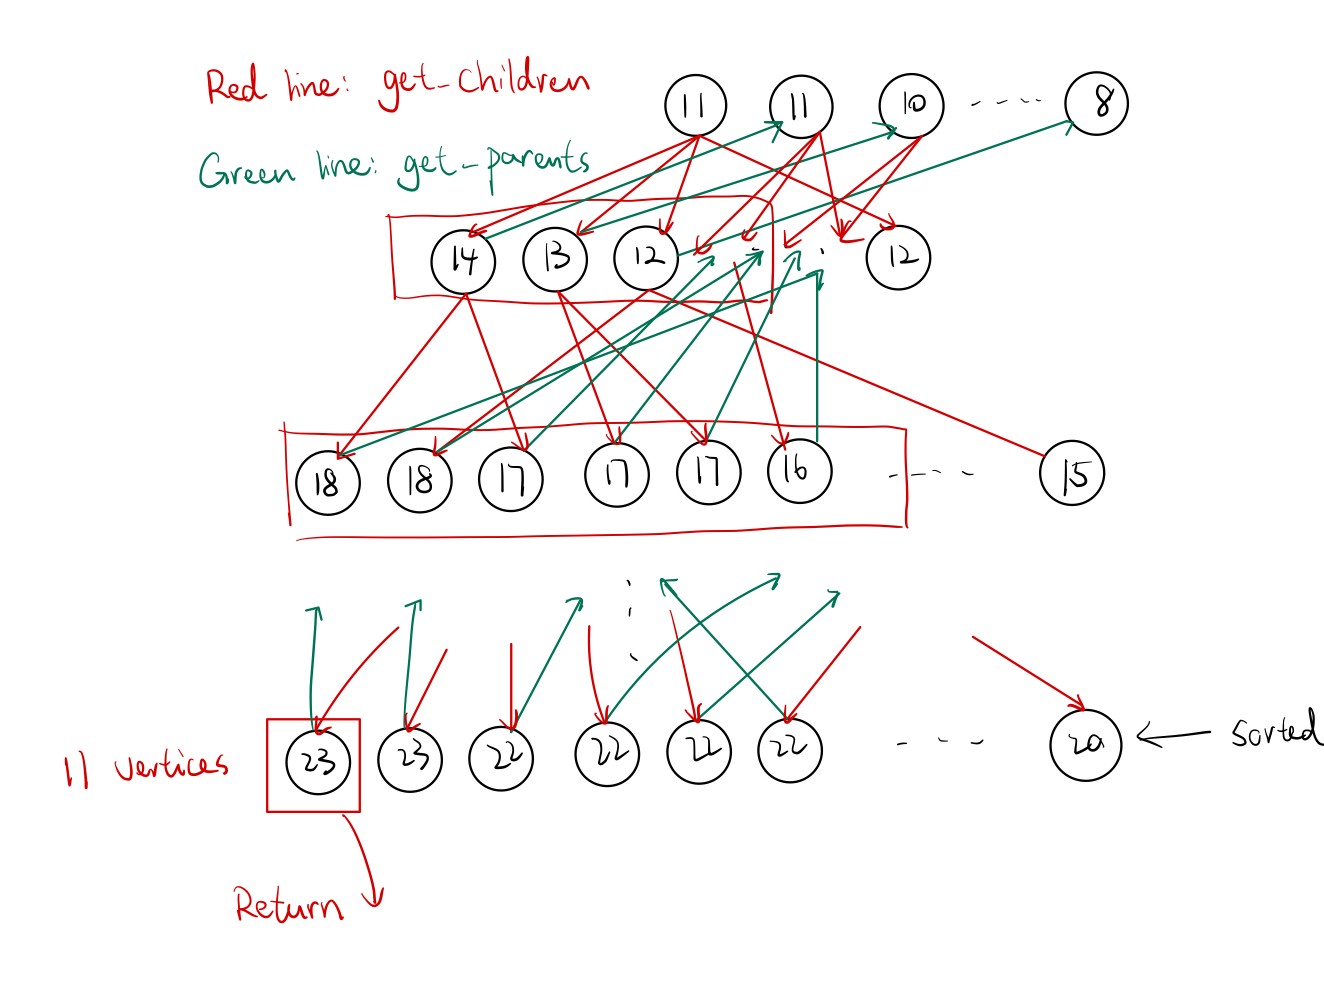

## Results

- The graph below illustrates partial results obtained through our beam search algorithm. The x-axis represents the number of vertices, while the y-axis represents the maximum edge number. The solid colored lines correspond to the results obtained from beam searches using beam widths from 1 to $2^{14}$. On the other hand, the dotted lines represent the upper bound, which is given by the expression $1.94n^{4/3}$, as stated in the paper.

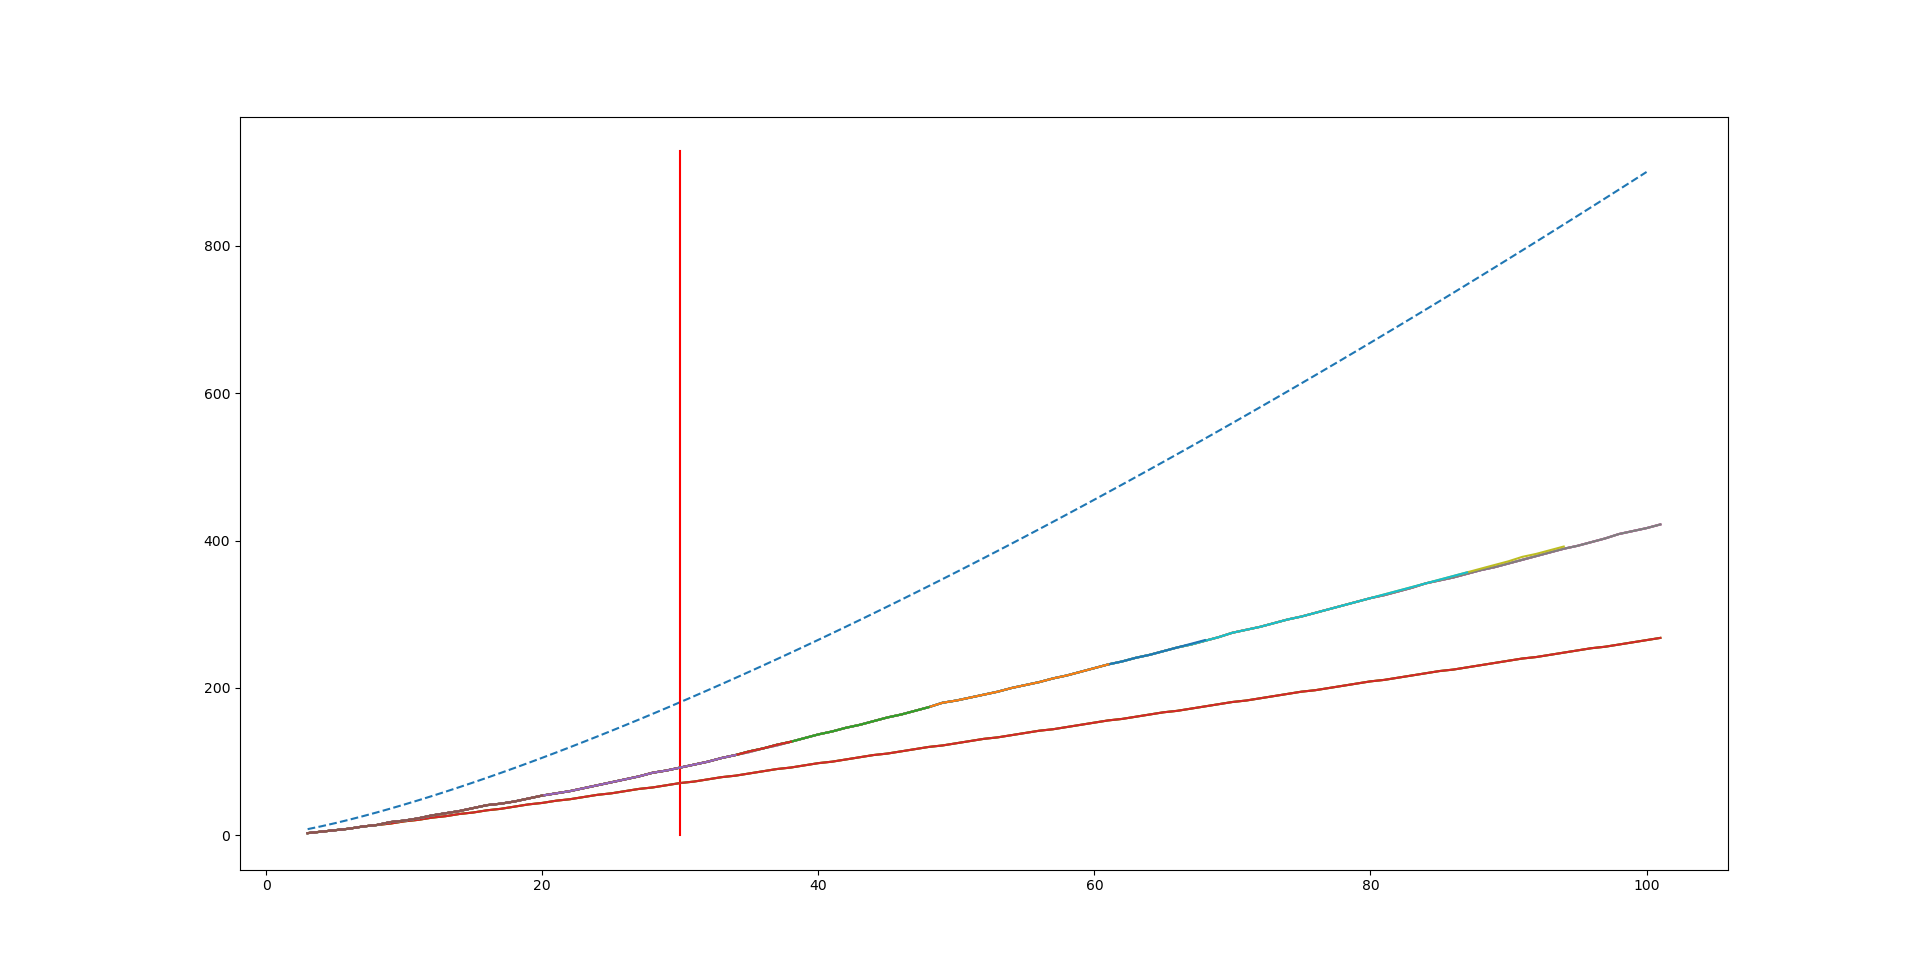